https://chatgpt.com/share/67223930-9f00-8010-a79a-f591a217fe28

1. Genrate 300 random variable X(i) in 0 to 700
2. Y(i)=1      IF 200< X(i)< 350, ELSE Y(I)=0  
3. Logistic regression => PREDICT result y1, SVM output => Predict result y2
4. draw X,Y1 in one figure , and  draw X,Y2 in another


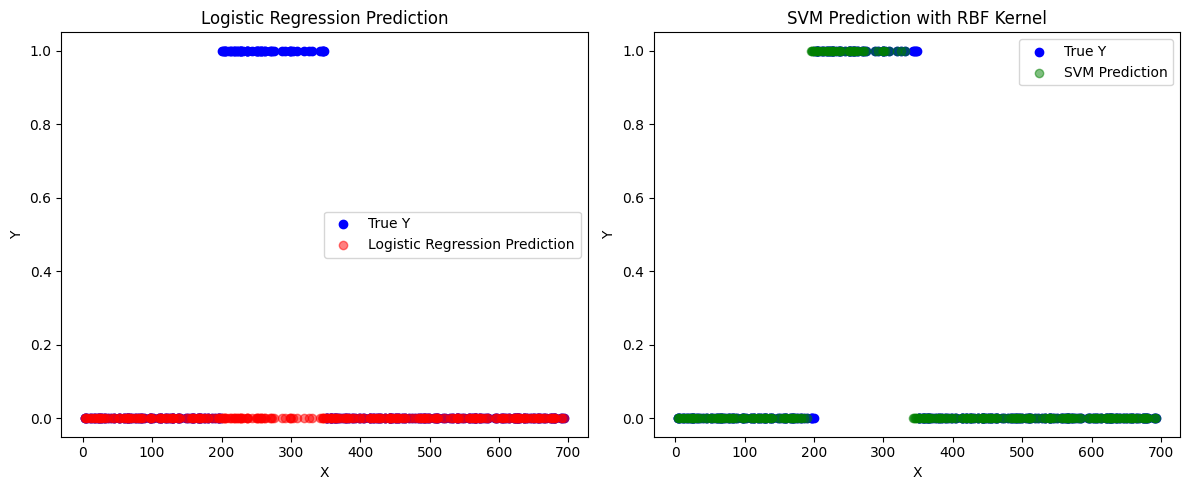

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Step 1: Generate 300 random variables X(i) in the range 0 to 700
np.random.seed(42)  # For reproducibility
X = np.random.uniform(0, 700, 300)
X = X.reshape(-1, 1)  # Reshape to a 2D array for model training

# Step 2: Define Y(i) according to the condition Y(i)=1 if 200 < X(i) < 350, else Y(i)=0
Y = np.where((X > 200) & (X < 350), 1, 0).ravel()

# Step 3: Feature Scaling for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train Logistic Regression model and SVM model with RBF kernel, then predict results
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_scaled, Y)
Y1_pred = log_reg.predict(X_scaled)

# SVM with RBF kernel for non-linear decision boundary
svm_model = SVC(kernel='rbf', gamma='scale')  # RBF kernel for non-linear decision
svm_model.fit(X_scaled, Y)
Y2_pred = svm_model.predict(X_scaled)

# Step 5: Plot the results
plt.figure(figsize=(12, 5))

# Plot for Logistic Regression
plt.subplot(1, 2, 1)
plt.scatter(X, Y, color='blue', label='True Y')
plt.scatter(X, Y1_pred, color='red', label='Logistic Regression Prediction', alpha=0.5)
plt.title("Logistic Regression Prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Plot X vs Y2 (SVM prediction)
plt.subplot(1, 2, 2)
plt.scatter(X, Y, color='blue', label='True Y')
plt.scatter(X, Y2_pred, color='green', label='SVM Prediction', alpha=0.5)
plt.title("SVM Prediction with RBF Kernel")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.tight_layout()
plt.show()


1. Genrate 300 random variable X(i) in 0 to 700
2. IF 200< X(i)< 350  Y(i)=1 else=0
3. Logistic regression output => result y1, SVM output => result y2
4. draw X,Y1 in one figure , and draw X,Y2 in another
5. adding the decision hyperplane for each algorithm

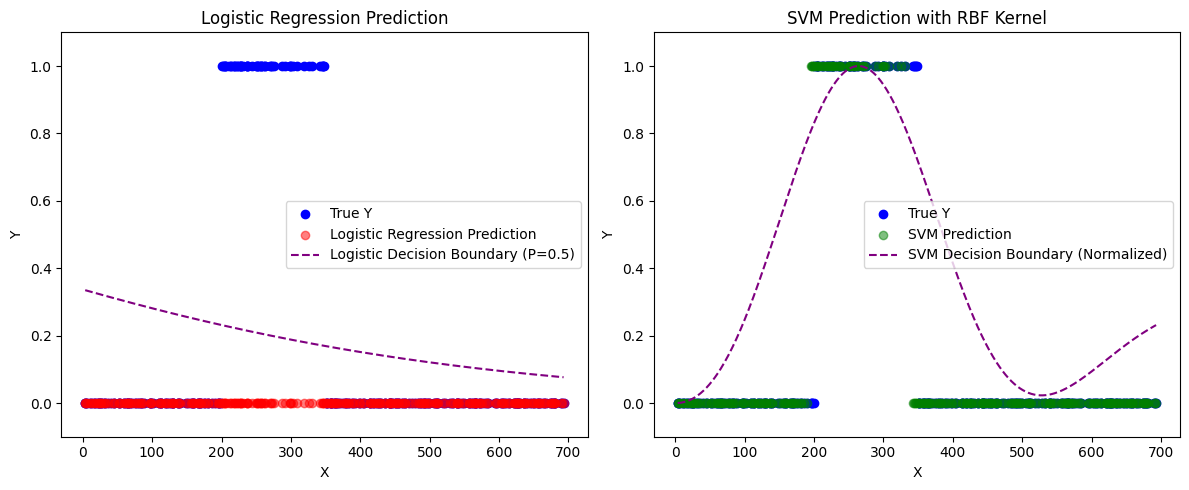

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Step 1: Generate 300 random variables X(i) in the range 0 to 700
np.random.seed(42)  # For reproducibility
X = np.random.uniform(0, 700, 300)
X = X.reshape(-1, 1)  # Reshape to a 2D array for model training

# Step 2: Define Y(i) according to the condition Y(i)=1 if 200 < X(i) < 350, else Y(i)=0
Y = np.where((X > 200) & (X < 350), 1, 0).ravel()

# Step 3: Feature Scaling for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train Logistic Regression and SVM with RBF kernel, then predict results
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_scaled, Y)
Y1_pred = log_reg.predict(X_scaled)

# SVM with RBF kernel for non-linear decision boundary
svm_model = SVC(kernel='rbf', gamma='scale', probability=True)
svm_model.fit(X_scaled, Y)
Y2_pred = svm_model.predict(X_scaled)

# Generate a range for X values to plot decision boundaries smoothly
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)

# Predict probabilities for logistic regression (decision boundary at P=0.5)
Y1_proba = log_reg.predict_proba(X_range_scaled)[:, 1]

# Predict probabilities for SVM (using decision_function normalized to [0, 1])
Y2_decision = (svm_model.decision_function(X_range_scaled) - svm_model.decision_function(X_range_scaled).min()) \
              / (svm_model.decision_function(X_range_scaled).max() - svm_model.decision_function(X_range_scaled).min())

# Step 5: Plot the results including decision hyperplane
plt.figure(figsize=(12, 5))

# Plot for Logistic Regression
plt.subplot(1, 2, 1)
plt.scatter(X, Y, color='blue', label='True Y')
plt.scatter(X, Y1_pred, color='red', label='Logistic Regression Prediction', alpha=0.5)
plt.plot(X_range, Y1_proba, color='purple', linestyle="--", label='Logistic Decision Boundary (P=0.5)')
plt.ylim(-0.1, 1.1)
plt.title("Logistic Regression Prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Plot for SVM with RBF kernel
plt.subplot(1, 2, 2)
plt.scatter(X, Y, color='blue', label='True Y')
plt.scatter(X, Y2_pred, color='green', label='SVM Prediction', alpha=0.5)
plt.plot(X_range, Y2_decision, color='purple', linestyle="--", label='SVM Decision Boundary (Normalized)')
plt.ylim(-0.1, 1.1)
plt.title("SVM Prediction with RBF Kernel")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.tight_layout()
plt.show()


1. 產生300個0~700的亂數
2. if 200< x <350 y=1，else y=0
3. Logistic regression output => result y1, SVM output => result y2
4. reorder y, y1 by value of x and draw y, y1 . Overlay the Logistic Regression predictions (blue line)
5. reorder y, y2 by value of x and draw y, y2 . Overlay a line plot of the SVM predictions (red line).

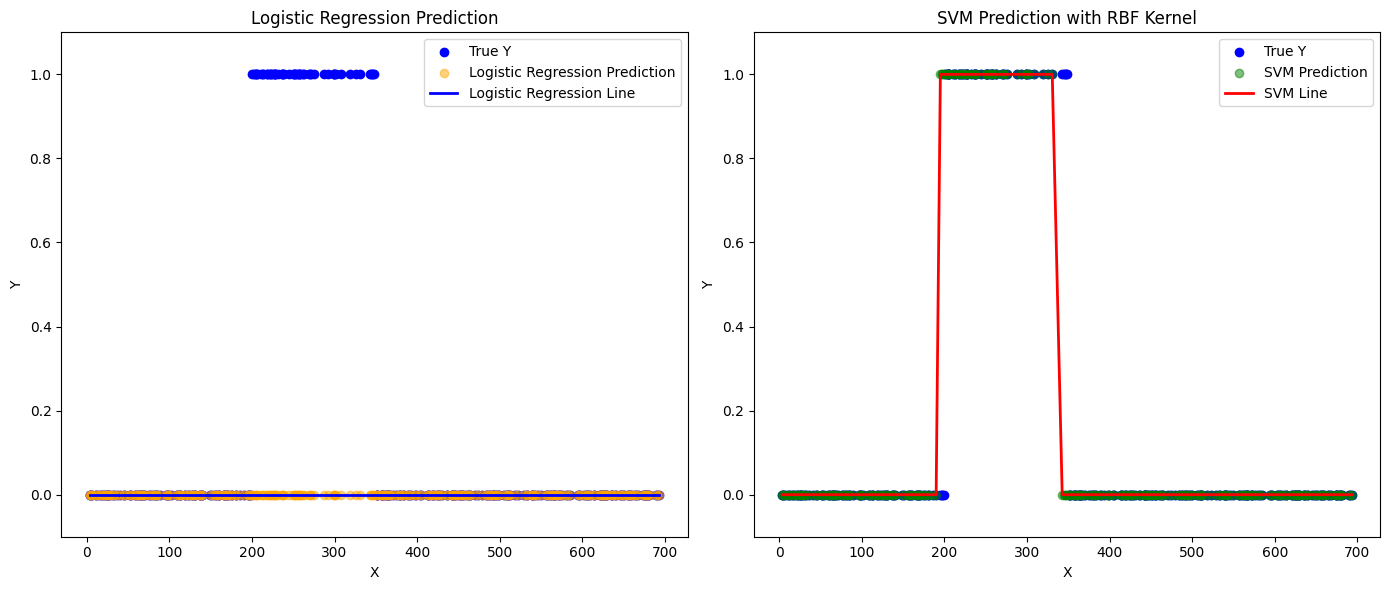

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Step 1: Generate 300 random variables X(i) in the range 0 to 700
np.random.seed(42)  # For reproducibility
X = np.random.uniform(0, 700, 300)
X = X.reshape(-1, 1)  # Reshape to a 2D array for model training

# Step 2: Define Y(i) according to the condition Y(i)=1 if 200 < X(i) < 350, else Y(i)=0
Y = np.where((X > 200) & (X < 350), 1, 0).ravel()

# Step 3: Feature Scaling for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train Logistic Regression and SVM with RBF kernel, then predict results
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_scaled, Y)
Y1_pred = log_reg.predict(X_scaled)

# SVM with RBF kernel for non-linear decision boundary
svm_model = SVC(kernel='rbf', gamma='scale', probability=True)
svm_model.fit(X_scaled, Y)
Y2_pred = svm_model.predict(X_scaled)

# Step 5: Reorder by value of X
# Create a DataFrame to hold X, Y, Y1, Y2 for sorting
data = np.hstack((X, Y.reshape(-1, 1), Y1_pred.reshape(-1, 1), Y2_pred.reshape(-1, 1)))
data_sorted = data[data[:, 0].argsort()]  # Sort by first column (X)

# Extract sorted values
X_sorted = data_sorted[:, 0]
Y_sorted = data_sorted[:, 1]
Y1_sorted = data_sorted[:, 2]
Y2_sorted = data_sorted[:, 3]

# Step 6: Plot results
plt.figure(figsize=(14, 6))

# Plot for Logistic Regression predictions
plt.subplot(1, 2, 1)
plt.scatter(X_sorted, Y_sorted, color='blue', label='True Y')
plt.scatter(X_sorted, Y1_sorted, color='orange', label='Logistic Regression Prediction', alpha=0.5)
plt.plot(X_sorted, Y1_sorted, color='blue', label='Logistic Regression Line', linewidth=2)  # Overlay line plot
plt.title("Logistic Regression Prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.ylim(-0.1, 1.1)
plt.legend()

# Plot for SVM predictions
plt.subplot(1, 2, 2)
plt.scatter(X_sorted, Y_sorted, color='blue', label='True Y')
plt.scatter(X_sorted, Y2_sorted, color='green', label='SVM Prediction', alpha=0.5)
plt.plot(X_sorted, Y2_sorted, color='red', label='SVM Line', linewidth=2)  # Overlay line plot
plt.title("SVM Prediction with RBF Kernel")
plt.xlabel("X")
plt.ylabel("Y")
plt.ylim(-0.1, 1.1)
plt.legend()

plt.tight_layout()
plt.show()
